# **Khulika Malkan**
Pemodelan Pergerakan Harga Saham Menggunakan Metode Random Walk

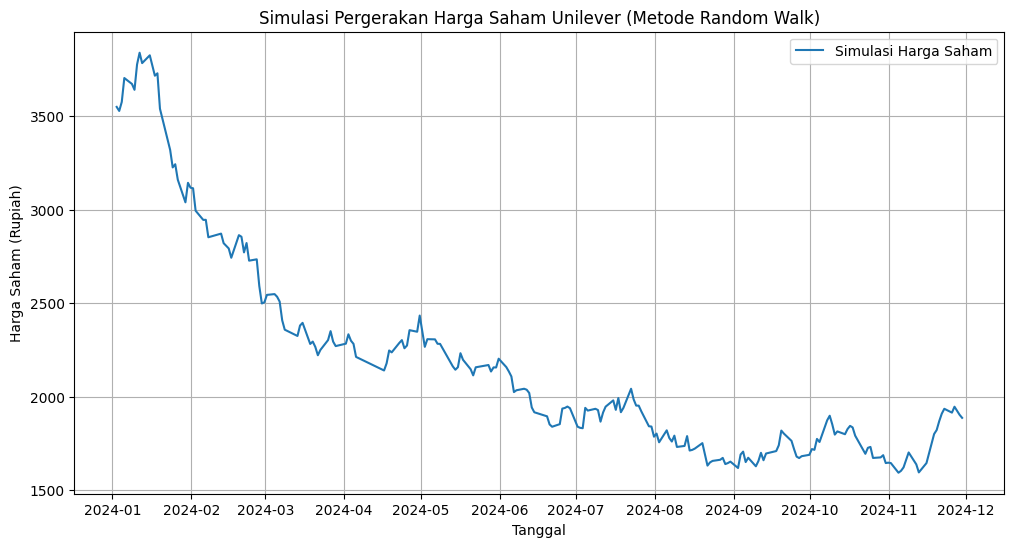

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
file_path = '/content/SAHAM UNLIVER INDONESIA - Sheet1.csv'
data_unilever = pd.read_csv(file_path)

# Preprocessing data
data_unilever['Date'] = pd.to_datetime(data_unilever['Date'], format='%d/%m/%Y %H:%M:%S')
data_unilever = data_unilever.sort_values('Date')

# Menggunakan harga penutupan saham dan menghitung drift serta volatilitas
harga_awal = data_unilever['Close'].iloc[0]  # Harga awal dari data
hari_perdagangan = len(data_unilever)  # Jumlah hari perdagangan dalam data

data_unilever['Daily_Return'] = data_unilever['Close'].pct_change()
rata2_drift = data_unilever['Daily_Return'].mean()
volatilitas = data_unilever['Daily_Return'].std()

# Simulasi Random Walk
np.random.seed(42)  # Untuk reproduktifitas
drift = rata2_drift
shock = np.random.normal(0, volatilitas, hari_perdagangan)
harga = [harga_awal]

for i in range(1, hari_perdagangan):
    perubahan = drift + shock[i]
    harga_baru = harga[-1] * (1 + perubahan)
    harga.append(harga_baru)

# Plot hasil simulasi
plt.figure(figsize=(12, 6))
plt.plot(data_unilever['Date'], harga, label='Simulasi Harga Saham')
plt.title('Simulasi Pergerakan Harga Saham Unilever (Metode Random Walk)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rupiah)')
plt.legend()
plt.grid()
plt.show()


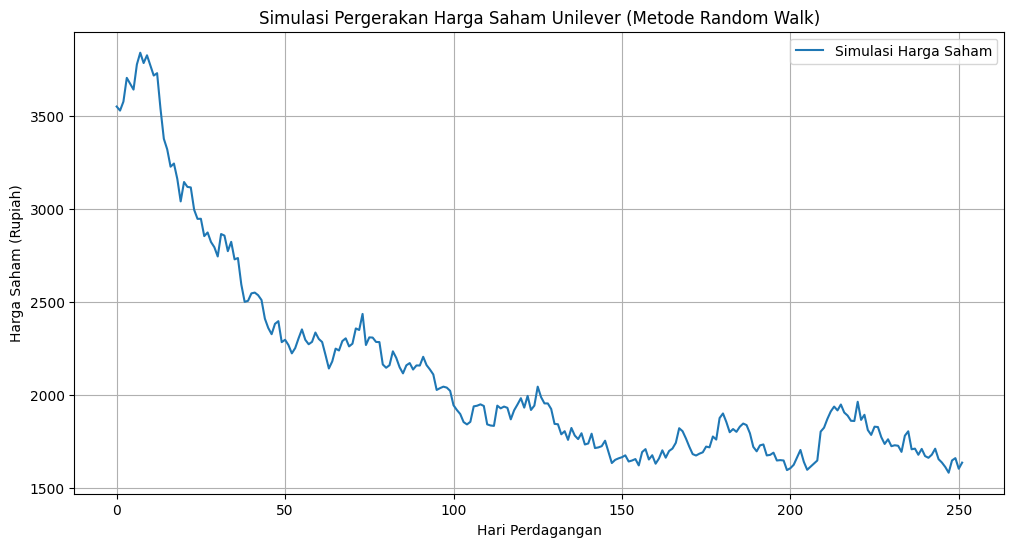

Rata-rata harga saham per bulan:
Month
january      3325.000000
february     2876.111111
march        2715.000000
april        2550.000000
may          2823.888889
june         3058.333333
july         2792.608696
august       2386.363636
september    2227.000000
october      2223.260870
november     1816.750000
Name: Close, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data historis dari file CSV
file_path = '/content/SAHAM UNLIVER INDONESIA - Sheet1.csv'
data_unilever = pd.read_csv(file_path)

# Preprocessing data
data_unilever['Date'] = pd.to_datetime(data_unilever['Date'], format='%d/%m/%Y %H:%M:%S')
data_unilever = data_unilever.sort_values('Date')  # Sort by date
data_unilever['Month'] = data_unilever['Date'].dt.strftime('%B').str.lower()  # Tambahkan label bulan

# Calculate daily returns
data_unilever['Daily_Return'] = data_unilever['Close'].pct_change()

# Calculate drift and volatility
rata2_drift = data_unilever['Daily_Return'].mean()
volatilitas = data_unilever['Daily_Return'].std()

# Simulasi Random Walk berdasarkan data historis
harga_awal = data_unilever['Close'].iloc[0]  # Harga awal berdasarkan data
hari_perdagangan = 252  # Jumlah hari perdagangan dalam setahun
drift = rata2_drift
np.random.seed(42)  # Untuk reproduktifitas
shock = np.random.normal(0, volatilitas, hari_perdagangan)
harga = [harga_awal]

for i in range(1, hari_perdagangan):
    perubahan = drift + shock[i]
    harga_baru = harga[-1] * (1 + perubahan)
    harga.append(harga_baru)

# Plot hasil simulasi per bulan
plt.figure(figsize=(12, 6))
plt.plot(harga, label='Simulasi Harga Saham')
plt.title('Simulasi Pergerakan Harga Saham Unilever (Metode Random Walk)')
plt.xlabel('Hari Perdagangan')
plt.ylabel('Harga Saham (Rupiah)')
plt.legend()
plt.grid()
plt.show()

# Tambahkan informasi bulanan
data_unilever_monthly = data_unilever.groupby('Month')['Close'].mean().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))
print("Rata-rata harga saham per bulan:")
print(data_unilever_monthly)


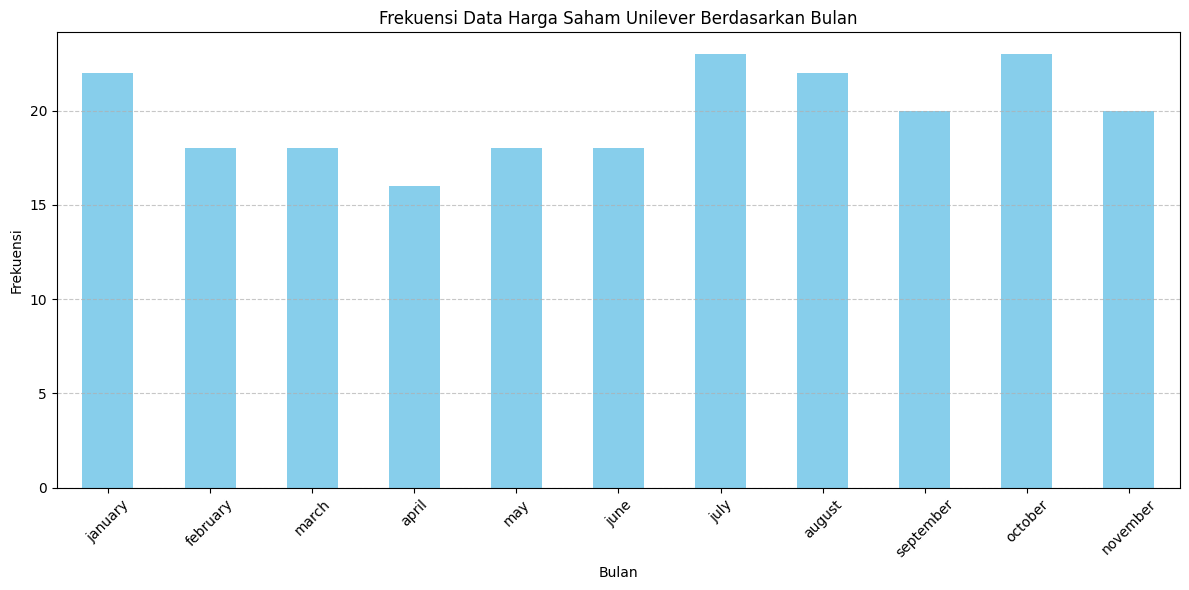

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
file_path = '/content/SAHAM UNLIVER INDONESIA - Sheet1.csv'
data_unilever = pd.read_csv(file_path)

# Preprocessing data
data_unilever['Date'] = pd.to_datetime(data_unilever['Date'], format='%d/%m/%Y %H:%M:%S')
data_unilever = data_unilever.sort_values('Date')

# Menambahkan kolom bulan dengan nama bulan
data_unilever['Month'] = data_unilever['Date'].dt.strftime('%B').str.lower()  # Nama bulan dalam bahasa Indonesia

# Menghitung frekuensi data untuk setiap bulan
frekuensi_bulanan = data_unilever['Month'].value_counts().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))

# Visualisasi frekuensi data setiap bulan
plt.figure(figsize=(12, 6))
frekuensi_bulanan.plot(kind='bar', color='skyblue')
plt.title('Frekuensi Data Harga Saham Unilever Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


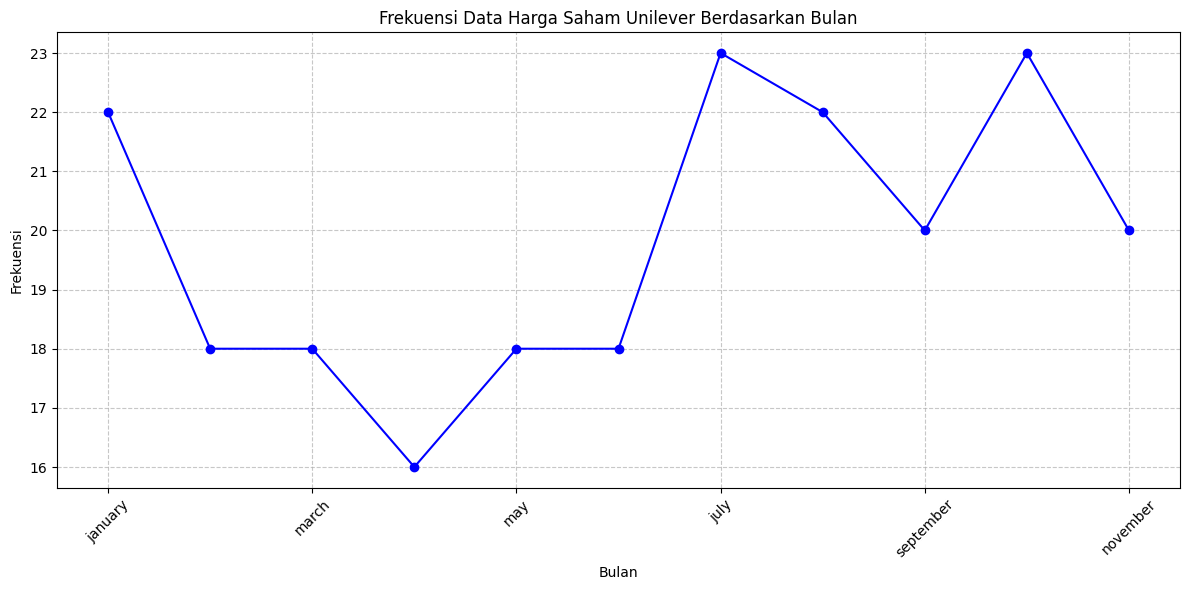

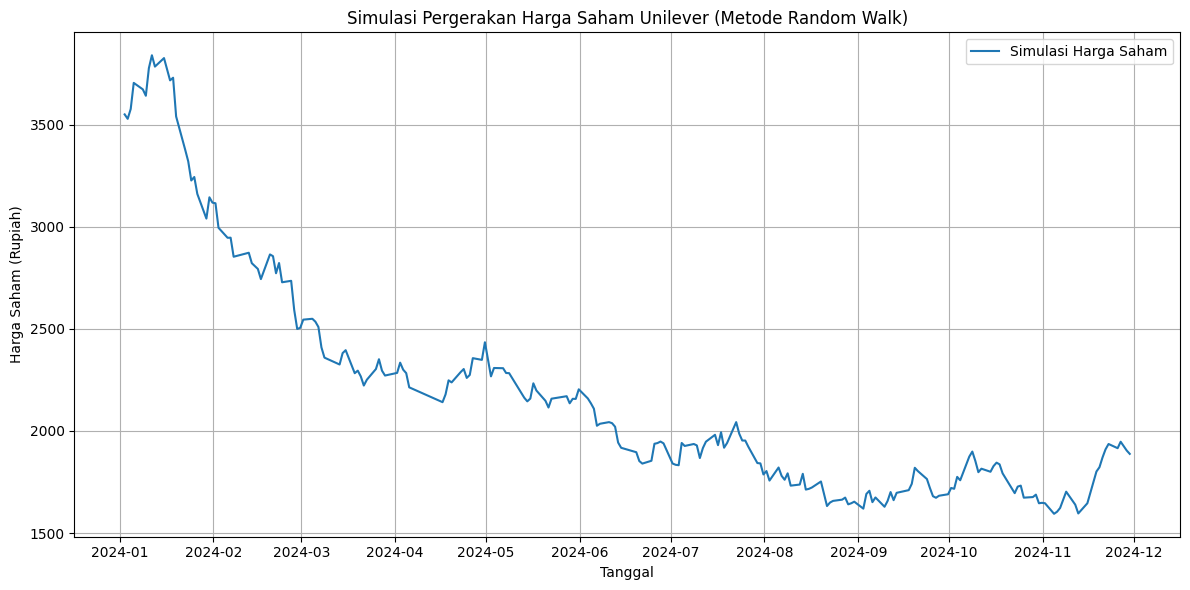

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
file_path = '/content/SAHAM UNLIVER INDONESIA - Sheet1.csv'
data_unilever = pd.read_csv(file_path)

# Preprocessing data
data_unilever['Date'] = pd.to_datetime(data_unilever['Date'], format='%d/%m/%Y %H:%M:%S')
data_unilever = data_unilever.sort_values('Date')

# Menambahkan kolom bulan dengan nama bulan
data_unilever['Month'] = data_unilever['Date'].dt.strftime('%B').str.lower()  # Nama bulan dalam bahasa Indonesia

# Menghitung frekuensi data untuk setiap bulan
frekuensi_bulanan = data_unilever['Month'].value_counts().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))

# Visualisasi frekuensi data setiap bulan (diagram garis)
plt.figure(figsize=(12, 6))
frekuensi_bulanan.plot(kind='line', marker='o', color='blue')
plt.title('Frekuensi Data Harga Saham Unilever Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Menggunakan harga penutupan saham dan menghitung drift serta volatilitas
harga_awal = data_unilever['Close'].iloc[0]  # Harga awal dari data
hari_perdagangan = len(data_unilever)  # Jumlah hari perdagangan dalam data

data_unilever['Daily_Return'] = data_unilever['Close'].pct_change()
rata2_drift = data_unilever['Daily_Return'].mean()
volatilitas = data_unilever['Daily_Return'].std()

# Simulasi Random Walk
np.random.seed(42)  # Untuk reproduktifitas
drift = rata2_drift
shock = np.random.normal(0, volatilitas, hari_perdagangan)
harga = [harga_awal]

for i in range(1, hari_perdagangan):
    perubahan = drift + shock[i]
    harga_baru = harga[-1] * (1 + perubahan)
    harga.append(harga_baru)

# Plot hasil simulasi Random Walk
plt.figure(figsize=(12, 6))
plt.plot(data_unilever['Date'], harga[:len(data_unilever)], label='Simulasi Harga Saham')
plt.title('Simulasi Pergerakan Harga Saham Unilever (Metode Random Walk)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rupiah)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Statistik Perubahan Harian Simulasi Harga Saham:
Perubahan Harian Maksimum: 9.44%
Perubahan Harian Minimum: -6.87%
Perubahan Harian Rata-rata: -0.26%


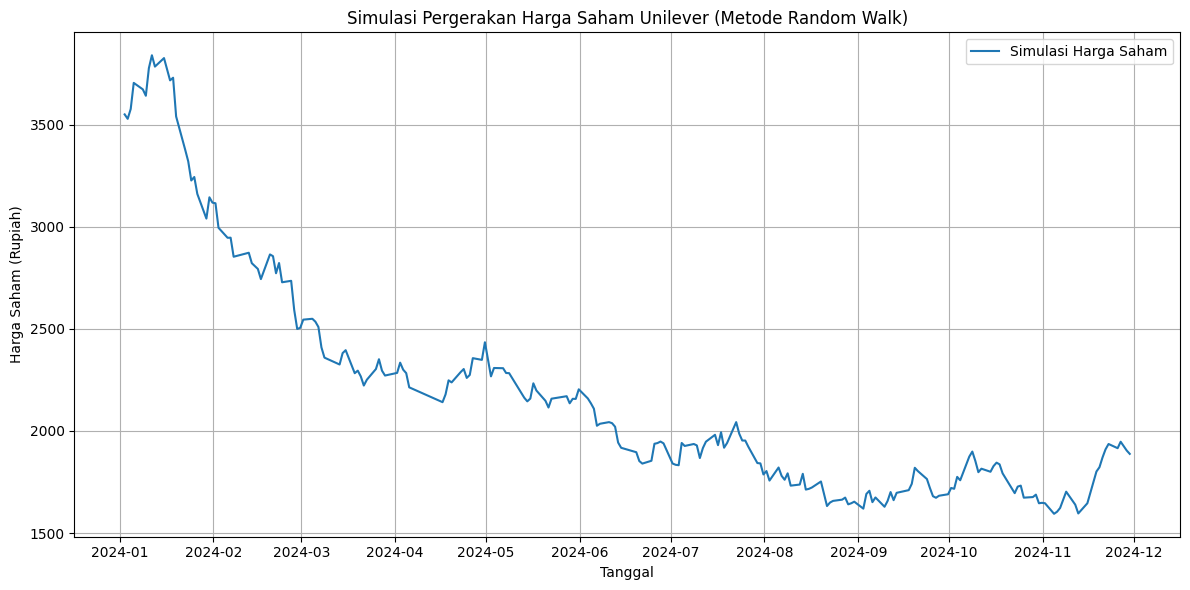

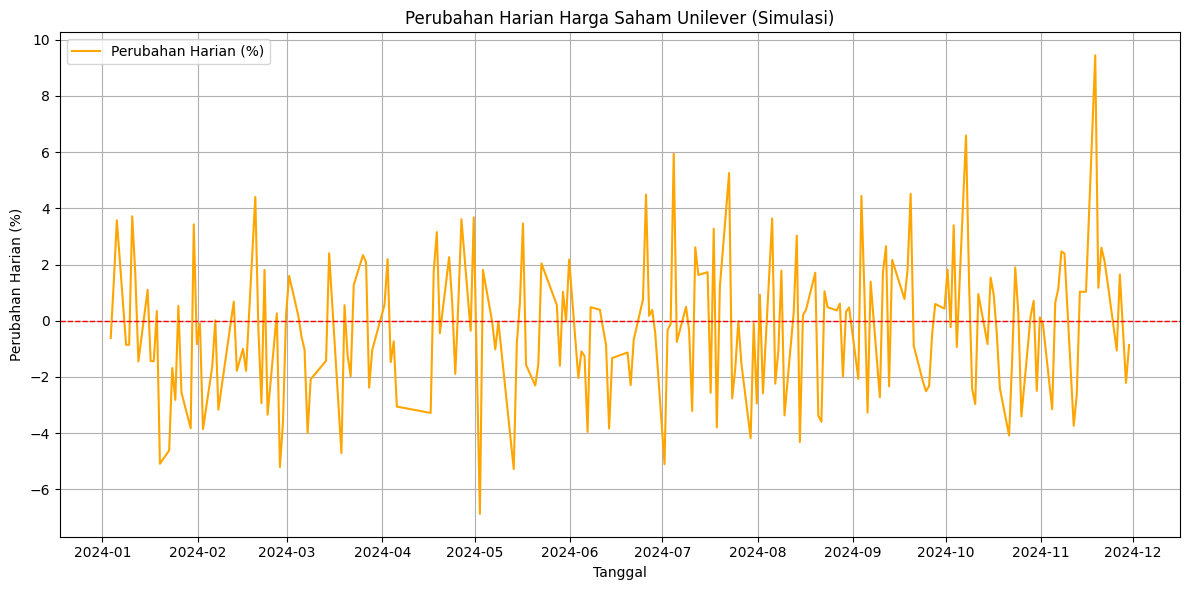

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
file_path = '/content/SAHAM UNLIVER INDONESIA - Sheet1.csv'
data_unilever = pd.read_csv(file_path)

# Preprocessing data
data_unilever['Date'] = pd.to_datetime(data_unilever['Date'], format='%d/%m/%Y %H:%M:%S')
data_unilever = data_unilever.sort_values('Date')

# Menggunakan harga penutupan saham dan menghitung drift serta volatilitas
harga_awal = data_unilever['Close'].iloc[0]  # Harga awal dari data
hari_perdagangan = len(data_unilever)  # Jumlah hari perdagangan dalam data

data_unilever['Daily_Return'] = data_unilever['Close'].pct_change()
rata2_drift = data_unilever['Daily_Return'].mean()
volatilitas = data_unilever['Daily_Return'].std()

# Simulasi Random Walk
np.random.seed(42)  # Untuk reproduktifitas
drift = rata2_drift
shock = np.random.normal(0, volatilitas, hari_perdagangan)
harga = [harga_awal]

for i in range(1, hari_perdagangan):
    perubahan = drift + shock[i]
    harga_baru = harga[-1] * (1 + perubahan)
    harga.append(harga_baru)

# Menghitung perubahan persentase pada simulasi
harga_simulasi = pd.DataFrame({
    'Date': data_unilever['Date'],
    'Harga_Simulasi': harga
})
harga_simulasi['Daily_Change'] = harga_simulasi['Harga_Simulasi'].pct_change() * 100  # Perubahan harian dalam %

# Statistik perubahan
max_change = harga_simulasi['Daily_Change'].max()
min_change = harga_simulasi['Daily_Change'].min()
avg_change = harga_simulasi['Daily_Change'].mean()

print("Statistik Perubahan Harian Simulasi Harga Saham:")
print(f"Perubahan Harian Maksimum: {max_change:.2f}%")
print(f"Perubahan Harian Minimum: {min_change:.2f}%")
print(f"Perubahan Harian Rata-rata: {avg_change:.2f}%")

# Plot hasil simulasi
plt.figure(figsize=(12, 6))
plt.plot(harga_simulasi['Date'], harga_simulasi['Harga_Simulasi'], label='Simulasi Harga Saham')
plt.title('Simulasi Pergerakan Harga Saham Unilever (Metode Random Walk)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rupiah)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot perubahan harian
plt.figure(figsize=(12, 6))
plt.plot(harga_simulasi['Date'], harga_simulasi['Daily_Change'], label='Perubahan Harian (%)', color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Perubahan Harian Harga Saham Unilever (Simulasi)')
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harian (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

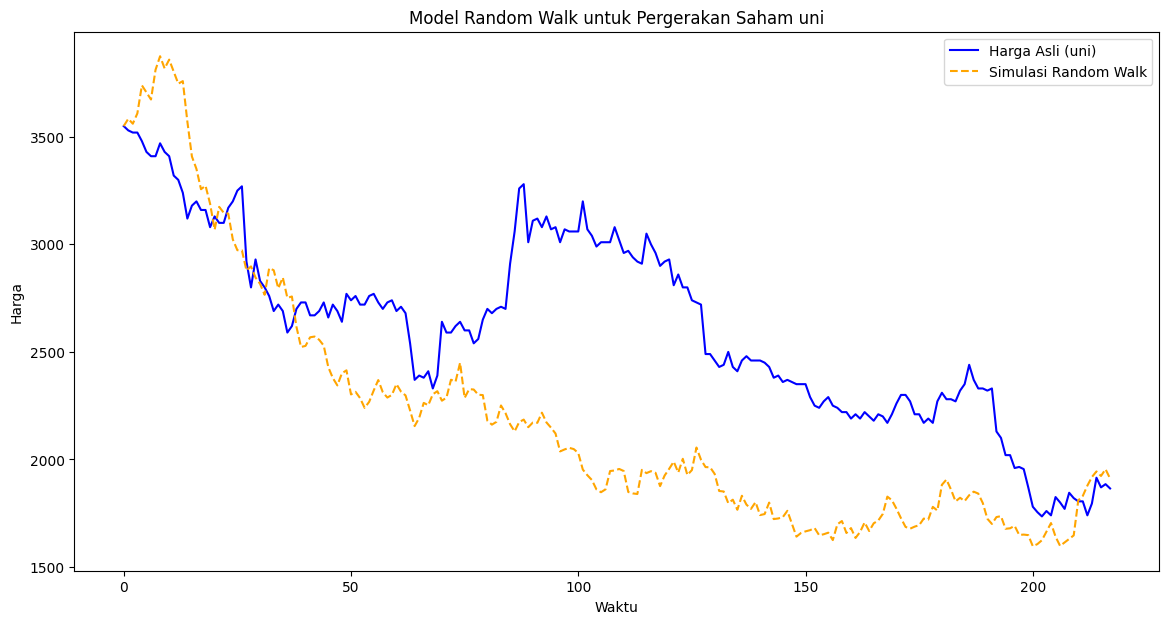

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/SAHAM UNLIVER INDONESIA - Sheet1.csv')

if 'Close' not in data.columns:
    raise ValueError("Data harus memiliki kolom 'Close'.")

close_prices = data['Close'].values
log_returns = np.log(close_prices[1:] / close_prices[:-1])
np.random.seed(42)
simulated_returns = np.random.normal(log_returns.mean(), log_returns.std(), len(log_returns))
simulated_prices = [close_prices[0]]

for ret in simulated_returns:
    simulated_prices.append(simulated_prices[-1] * np.exp(ret))

plt.figure(figsize=(14, 7))
plt.plot(close_prices, label='Harga Asli (uni)', color='blue')
plt.plot(simulated_prices, label='Simulasi Random Walk', color='orange', linestyle='--')
plt.title('Model Random Walk untuk Pergerakan Saham uni')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data saham Unilever (Pastikan file tersedia dan memiliki kolom 'Date' dan 'Close')
file_path = '/path/to/unilever_2024_data.csv'  # Ubah path dengan lokasi file Anda
data = pd.read_csv(file_path)

# Preprocessing data
data['Date'] = pd.to_datetime(data['Date'])  # Pastikan kolom 'Date' dalam format datetime
data = data[data['Date'].dt.year == 2024]   # Filter hanya untuk tahun 2024
data = data.sort_values('Date')

# Mengambil harga penutupan
close_prices = data['Close'].values

# Menghitung return logaritmik
log_returns = np.log(close_prices[1:] / close_prices[:-1])

# Parameter simulasi
np.random.seed(42)  # Seed untuk reproduktifitas
drift = log_returns.mean()
volatility = log_returns.std()

# Simulasi Random Walk
simulated_prices = [close_prices[0]]
days_to_simulate = len(close_prices)  # Simulasi sepanjang data yang ada

for _ in range(days_to_simulate - 1):
    random_shock = np.random.normal(drift, volatility)
    next_price = simulated_prices[-1] * np.exp(random_shock)
    simulated_prices.append(next_price)

# Visualisasi
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], close_prices, label='Harga Saham Asli (2024)', color='blue')
plt.plot(data['Date'], simulated_prices, label='Simulasi Random Walk', color='orange', linestyle='--')
plt.title('Model Random Walk untuk Pergerakan Harga Saham Unilever Tahun 2024')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rupiah)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/unilever_2024_data.csv'

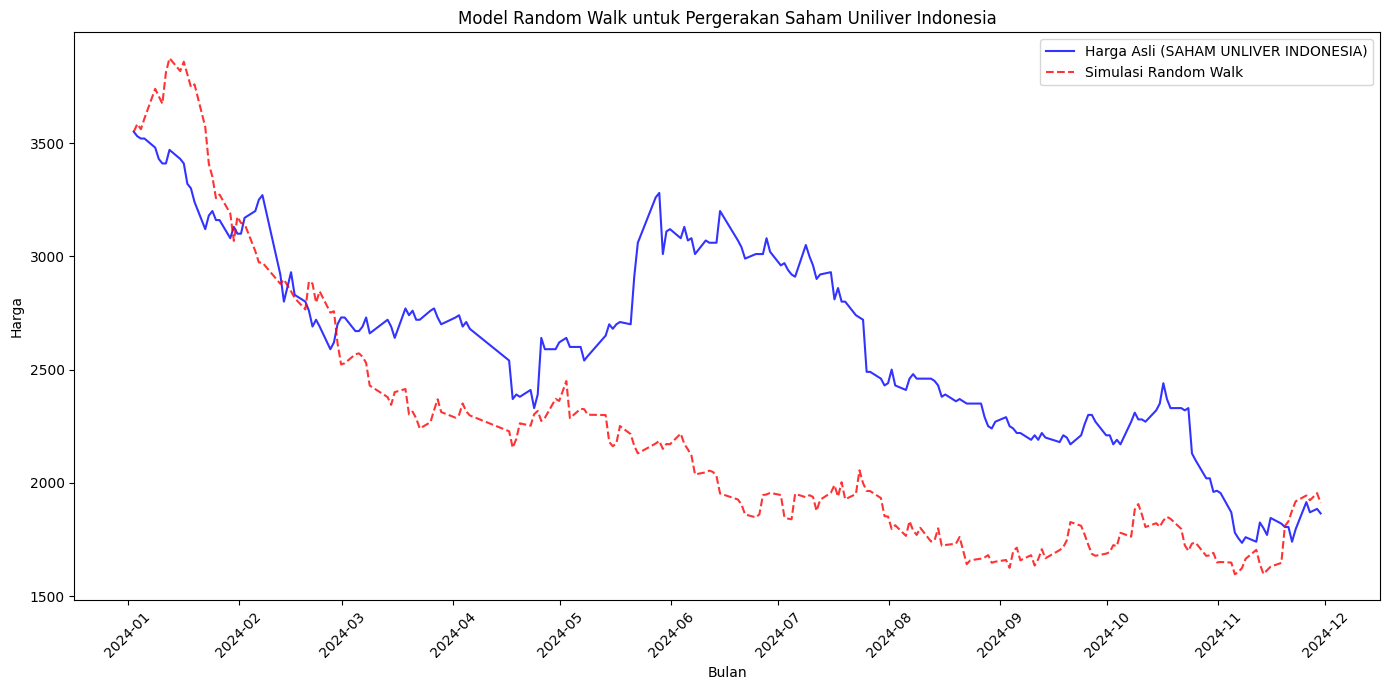

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/SAHAM UNLIVER INDONESIA - Sheet1.csv')

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

data = data.sort_values(by='Date')

close_prices = data['Close'].values
dates = data['Date']

log_returns = np.log(close_prices[1:] / close_prices[:-1])

np.random.seed(42)
simulated_returns = np.random.normal(log_returns.mean(), log_returns.std(), len(log_returns))
simulated_prices = [close_prices[0]]

for ret in simulated_returns:
    simulated_prices.append(simulated_prices[-1] * np.exp(ret))


plt.figure(figsize=(14, 7))
plt.plot(dates, close_prices, label='Harga Asli (SAHAM UNLIVER INDONESIA)', color='blue', alpha=0.8)
plt.plot(dates[:len(simulated_prices)], simulated_prices, label='Simulasi Random Walk', color='red', linestyle='--', alpha=0.8)
plt.title('Model Random Walk untuk Pergerakan Saham Uniliver Indonesia')
plt.xlabel('Bulan')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

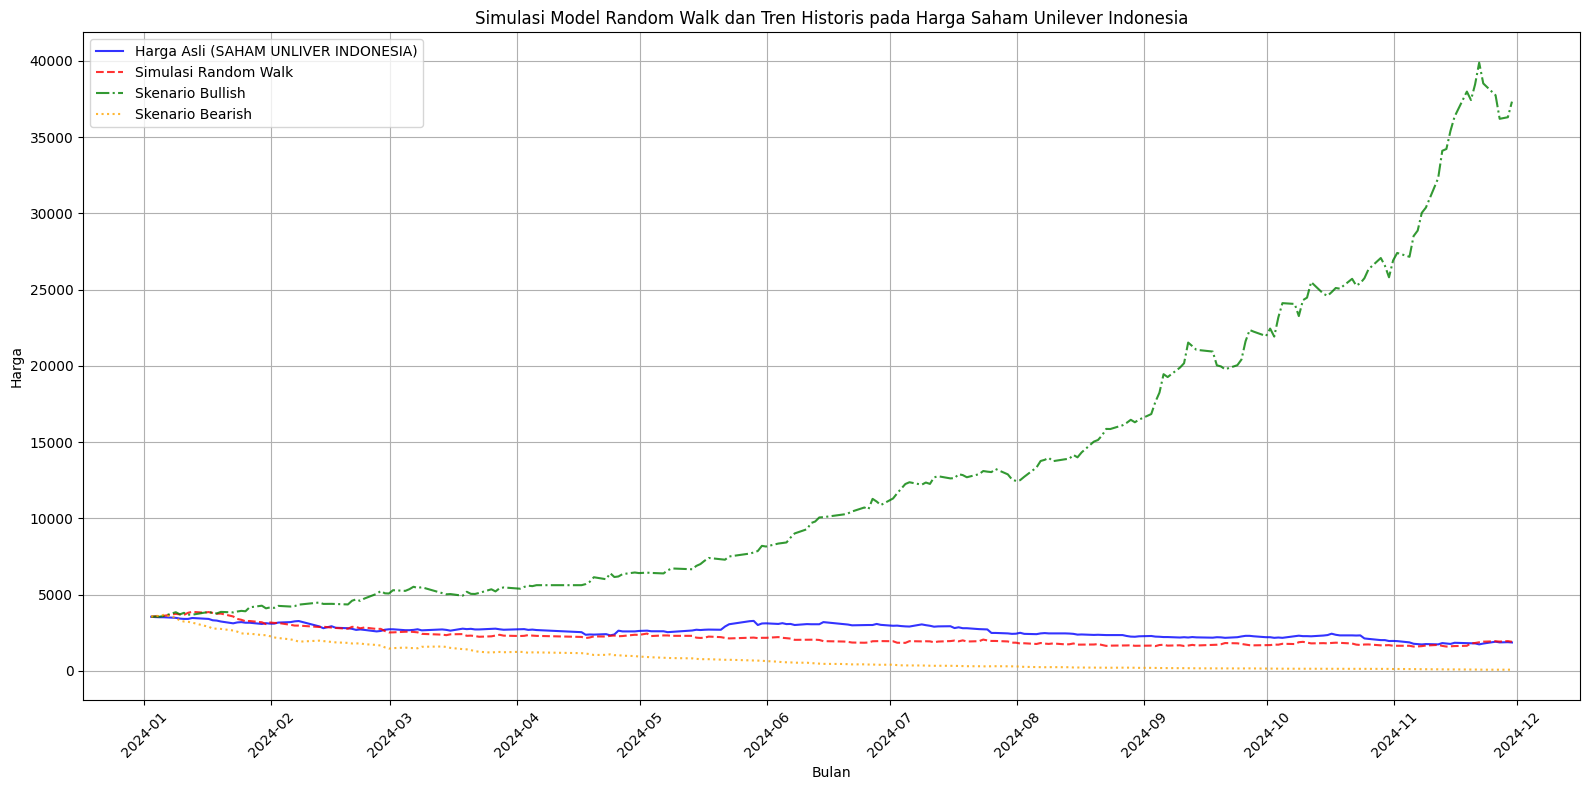

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('/content/SAHAM UNLIVER INDONESIA - Sheet1.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.sort_values(by='Date')

# Harga Penutupan dan Tanggal
close_prices = data['Close'].values
dates = data['Date']

# Menghitung log return historis
log_returns = np.log(close_prices[1:] / close_prices[:-1])

# Skenario 1: Simulasi Random Walk
np.random.seed(42)
simulated_returns_rw = np.random.normal(log_returns.mean(), log_returns.std(), len(log_returns))
simulated_prices_rw = [close_prices[0]]

for ret in simulated_returns_rw:
    simulated_prices_rw.append(simulated_prices_rw[-1] * np.exp(ret))

# Skenario 2: Tren Historis Bullish (Kenaikan Stabil)
bullish_trend = log_returns.mean() + log_returns.std() * 0.5
simulated_prices_bullish = [close_prices[0]]

for _ in range(len(log_returns)):
    ret = np.random.normal(bullish_trend, log_returns.std())
    simulated_prices_bullish.append(simulated_prices_bullish[-1] * np.exp(ret))

# Skenario 3: Tren Historis Bearish (Penurunan Stabil)
bearish_trend = log_returns.mean() - log_returns.std() * 0.5
simulated_prices_bearish = [close_prices[0]]

for _ in range(len(log_returns)):
    ret = np.random.normal(bearish_trend, log_returns.std())
    simulated_prices_bearish.append(simulated_prices_bearish[-1] * np.exp(ret))

# Plot hasil simulasi
plt.figure(figsize=(16, 8))
plt.plot(dates, close_prices, label='Harga Asli (SAHAM UNLIVER INDONESIA)', color='blue', alpha=0.8)
plt.plot(dates[:len(simulated_prices_rw)], simulated_prices_rw, label='Simulasi Random Walk', color='red', linestyle='--', alpha=0.8)
plt.plot(dates[:len(simulated_prices_bullish)], simulated_prices_bullish, label='Skenario Bullish', color='green', linestyle='-.', alpha=0.8)
plt.plot(dates[:len(simulated_prices_bearish)], simulated_prices_bearish, label='Skenario Bearish', color='orange', linestyle=':', alpha=0.8)

plt.title('Simulasi Model Random Walk dan Tren Historis pada Harga Saham Unilever Indonesia')
plt.xlabel('Bulan')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


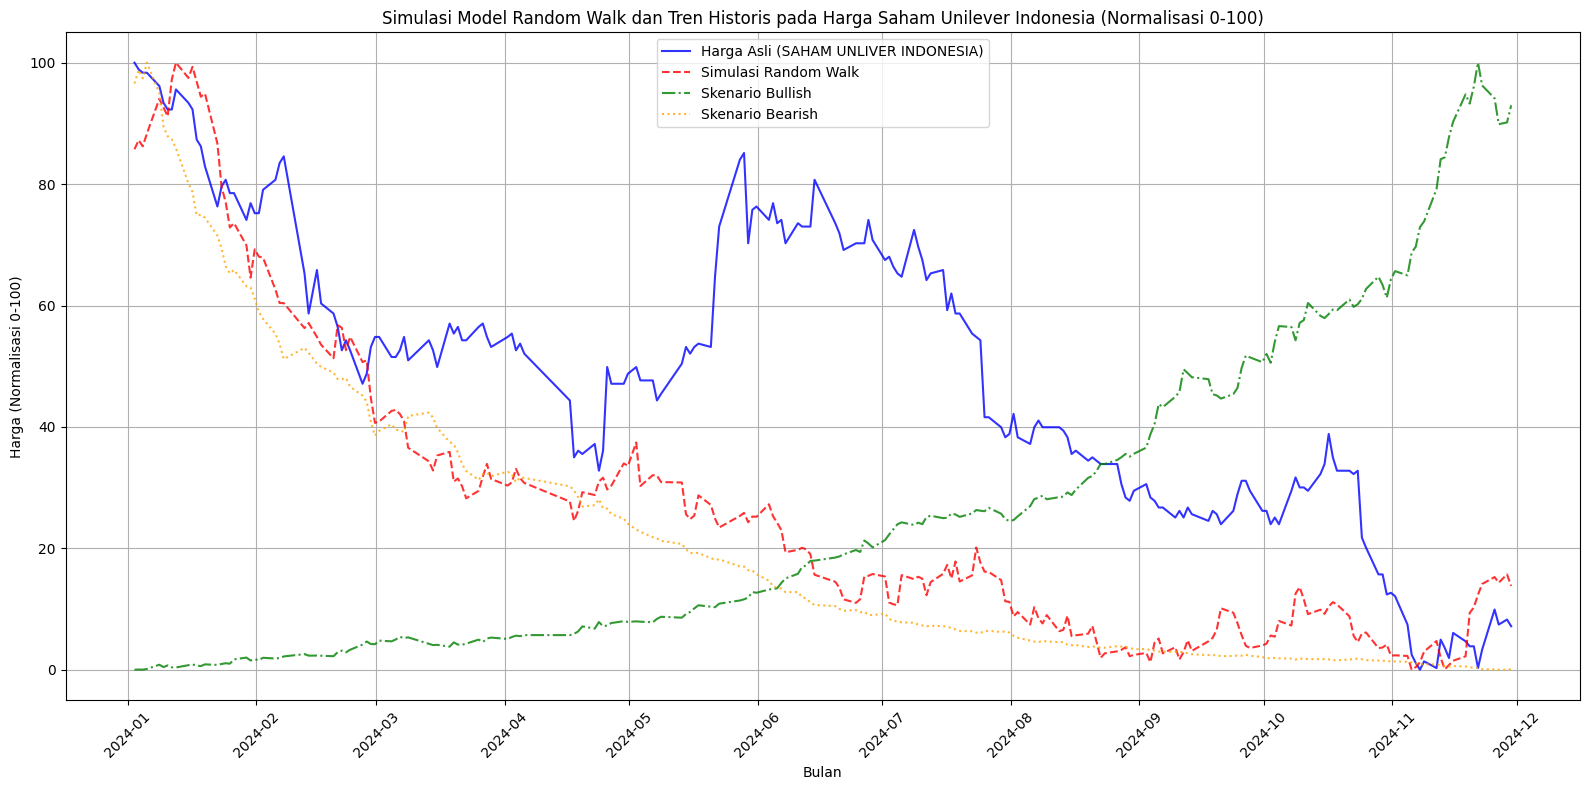

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('/content/SAHAM UNLIVER INDONESIA - Sheet1.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.sort_values(by='Date')

# Harga Penutupan dan Tanggal
close_prices = data['Close'].values
dates = data['Date']

# Menghitung log return historis
log_returns = np.log(close_prices[1:] / close_prices[:-1])

# Skenario 1: Simulasi Random Walk
np.random.seed(42)
simulated_returns_rw = np.random.normal(log_returns.mean(), log_returns.std(), len(log_returns))
simulated_prices_rw = [close_prices[0]]

for ret in simulated_returns_rw:
    simulated_prices_rw.append(simulated_prices_rw[-1] * np.exp(ret))

# Skenario 2: Tren Historis Bullish (Kenaikan Stabil)
bullish_trend = log_returns.mean() + log_returns.std() * 0.5
simulated_prices_bullish = [close_prices[0]]

for _ in range(len(log_returns)):
    ret = np.random.normal(bullish_trend, log_returns.std())
    simulated_prices_bullish.append(simulated_prices_bullish[-1] * np.exp(ret))

# Skenario 3: Tren Historis Bearish (Penurunan Stabil)
bearish_trend = log_returns.mean() - log_returns.std() * 0.5
simulated_prices_bearish = [close_prices[0]]

for _ in range(len(log_returns)):
    ret = np.random.normal(bearish_trend, log_returns.std())
    simulated_prices_bearish.append(simulated_prices_bearish[-1] * np.exp(ret))

# Normalisasi harga ke rentang 0-100
def normalize(prices):
    min_price = min(prices)
    max_price = max(prices)
    return [(price - min_price) / (max_price - min_price) * 100 for price in prices]

close_prices_norm = normalize(close_prices)
simulated_prices_rw_norm = normalize(simulated_prices_rw)
simulated_prices_bullish_norm = normalize(simulated_prices_bullish)
simulated_prices_bearish_norm = normalize(simulated_prices_bearish)

# Plot hasil simulasi
plt.figure(figsize=(16, 8))
plt.plot(dates, close_prices_norm, label='Harga Asli (SAHAM UNLIVER INDONESIA)', color='blue', alpha=0.8)
plt.plot(dates[:len(simulated_prices_rw_norm)], simulated_prices_rw_norm, label='Simulasi Random Walk', color='red', linestyle='--', alpha=0.8)
plt.plot(dates[:len(simulated_prices_bullish_norm)], simulated_prices_bullish_norm, label='Skenario Bullish', color='green', linestyle='-.', alpha=0.8)
plt.plot(dates[:len(simulated_prices_bearish_norm)], simulated_prices_bearish_norm, label='Skenario Bearish', color='orange', linestyle=':', alpha=0.8)

plt.title('Simulasi Model Random Walk dan Tren Historis pada Harga Saham Unilever Indonesia (Normalisasi 0-100)')
plt.xlabel('Bulan')
plt.ylabel('Harga (Normalisasi 0-100)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
data

,Date,Close
0,2024-01-02 16:00:00,3550
1,2024-01-03 16:00:00,3530
2,2024-01-04 16:00:00,3520
3,2024-01-05 16:00:00,3520
4,2024-01-08 16:00:00,3480
...,...,...
213,2024-11-22 16:00:00,1795
214,2024-11-25 16:00:00,1915
215,2024-11-26 16:00:00,1870
216,2024-11-28 16:00:00,1885


from matplotlib import pyplot as plt
_df_9['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='index', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

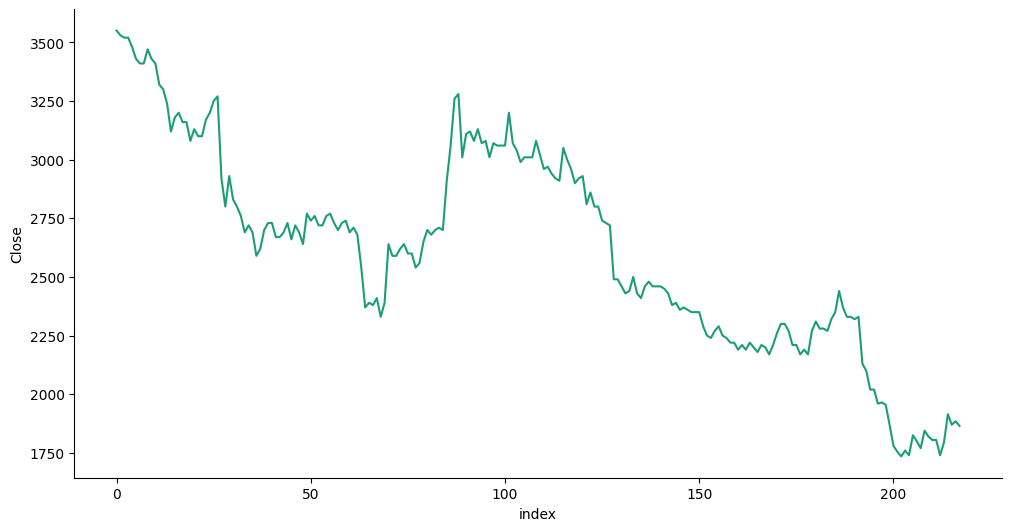

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Close')

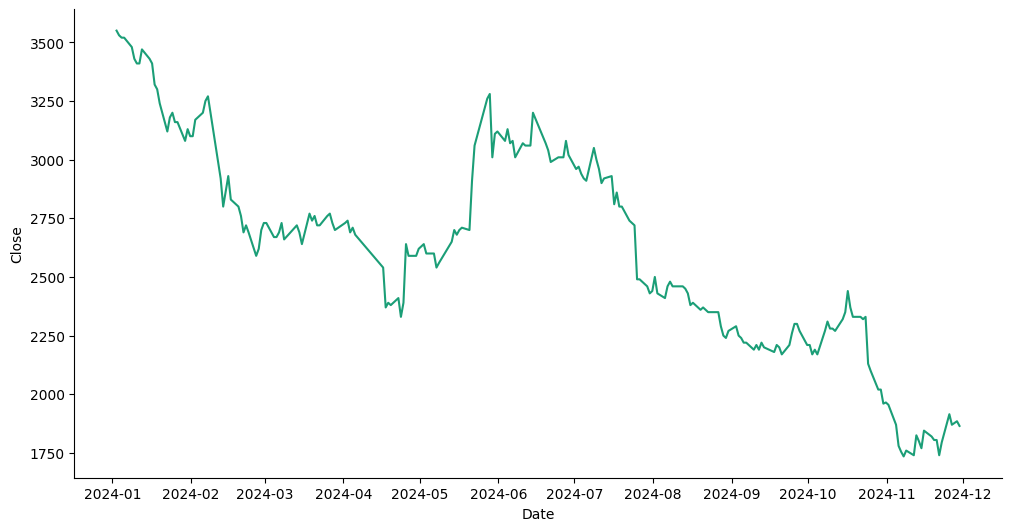

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

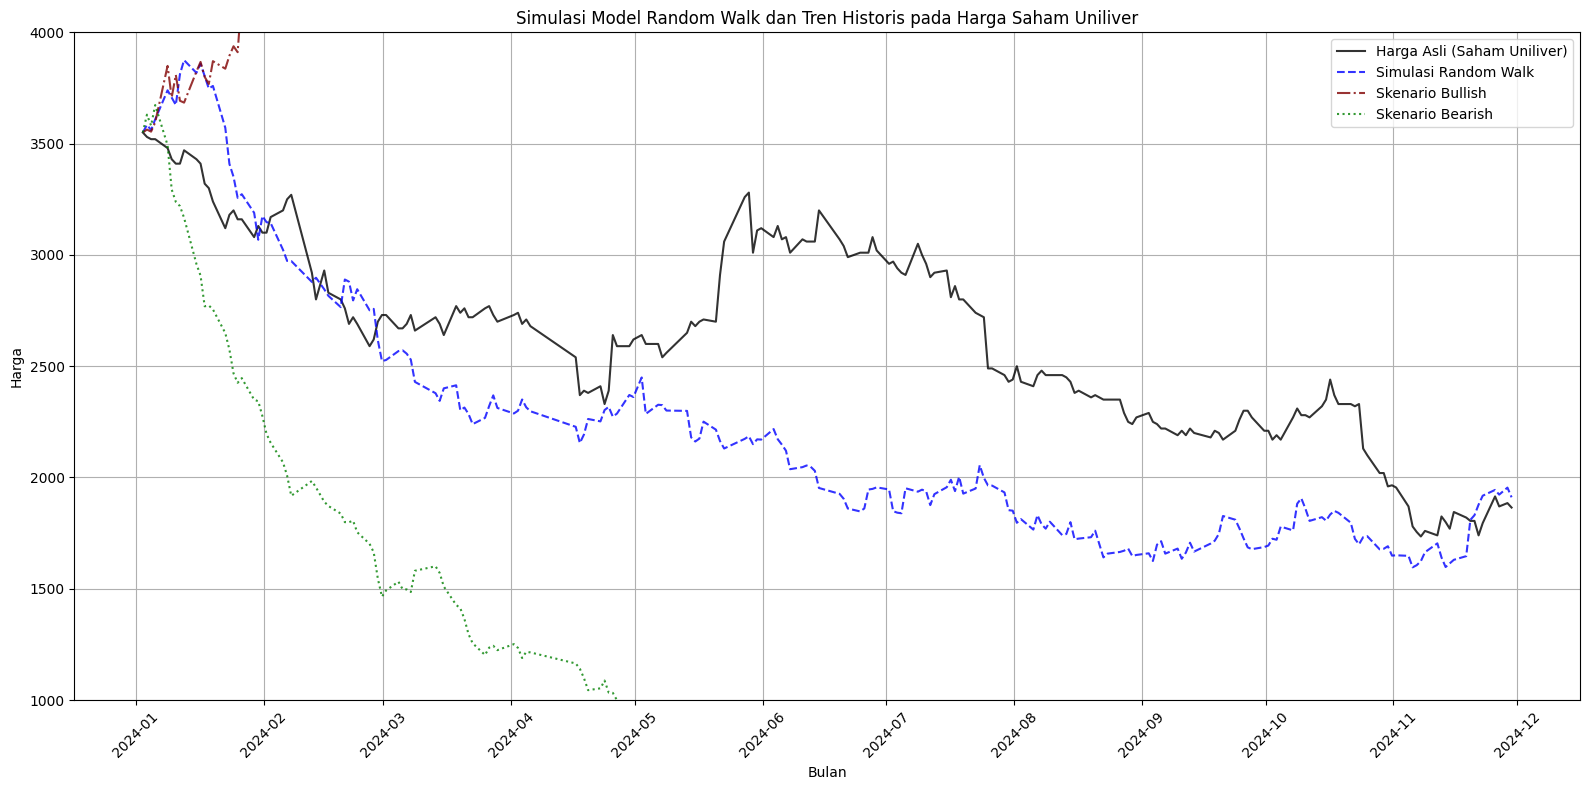

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('/content/SAHAM UNLIVER INDONESIA - Sheet1.csv')  # Membaca data saham dari file CSV
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Mengonversi kolom 'Date' menjadi format datetime
data = data.sort_values(by='Date')  # Mengurutkan data berdasarkan tanggal

# Harga Penutupan dan Tanggal
close_prices = data['Close'].values  # Mengambil harga penutupan dari dataset
dates = data['Date']  # Mengambil kolom tanggal dari dataset

# Menghitung log return historis
log_returns = np.log(close_prices[1:] / close_prices[:-1])  # Menghitung log return berdasarkan harga penutupan

# Skenario 1: Simulasi Random Walk
np.random.seed(42)  # Mengatur seed untuk memastikan hasil simulasi random konsisten
simulated_returns_rw = np.random.normal(log_returns.mean(), log_returns.std(), len(log_returns))
# Menghasilkan return acak menggunakan rata-rata dan standar deviasi log return historis
simulated_prices_rw = [close_prices[0]]  # Memulai simulasi dengan harga awal dari data asli

for ret in simulated_returns_rw:  # Loop untuk menghasilkan harga berdasarkan return acak
    simulated_prices_rw.append(simulated_prices_rw[-1] * np.exp(ret))
    # Menghitung harga berikutnya berdasarkan return acak

# Skenario 2: Tren Historis Bullish (Kenaikan Stabil)
bullish_trend = log_returns.mean() + log_returns.std() * 0.5  # Menentukan rata-rata return dengan bias bullish
simulated_prices_bullish = [close_prices[0]]  # Memulai simulasi dengan harga awal

for _ in range(len(log_returns)):  # Loop untuk menghasilkan harga pada skenario bullish
    ret = np.random.normal(bullish_trend, log_returns.std())  # Menghasilkan return dengan bias bullish
    simulated_prices_bullish.append(simulated_prices_bullish[-1] * np.exp(ret))
    # Menghitung harga berikutnya berdasarkan return bullish

# Skenario 3: Tren Historis Bearish (Penurunan Stabil)
bearish_trend = log_returns.mean() - log_returns.std() * 0.5  # Menentukan rata-rata return dengan bias bearish
simulated_prices_bearish = [close_prices[0]]  # Memulai simulasi dengan harga awal

for _ in range(len(log_returns)):  # Loop untuk menghasilkan harga pada skenario bearish
    ret = np.random.normal(bearish_trend, log_returns.std())  # Menghasilkan return dengan bias bearish
    simulated_prices_bearish.append(simulated_prices_bearish[-1] * np.exp(ret))
    # Menghitung harga berikutnya berdasarkan return bearish

# Plot hasil simulasi
plt.figure(figsize=(16, 8))  # Membuat plot dengan ukuran besar
plt.plot(dates, close_prices, label='Harga Asli (Saham Uniliver)', color='black', alpha=0.8)
# Memplot harga asli (historis) sebagai referensi
plt.plot(dates[:len(simulated_prices_rw)], simulated_prices_rw, label='Simulasi Random Walk', color='blue', linestyle='--', alpha=0.8)
# Memplot hasil simulasi random walk
plt.plot(dates[:len(simulated_prices_bullish)], simulated_prices_bullish, label='Skenario Bullish', color='maroon', linestyle='-.', alpha=0.8)
# Memplot hasil simulasi bullish
plt.plot(dates[:len(simulated_prices_bearish)], simulated_prices_bearish, label='Skenario Bearish', color='green', linestyle=':', alpha=0.8)
# Memplot hasil simulasi bearish

# Mengatur batas sumbu Y
plt.ylim(1000, 4000)  # Mengatur batas minimum dan maksimum harga pada sumbu Y

plt.title('Simulasi Model Random Walk dan Tren Historis pada Harga Saham Uniliver')  # Judul plot
plt.xlabel('Bulan')  # Label untuk sumbu X
plt.ylabel('Harga')  # Label untuk sumbu Y
plt.xticks(rotation=45)  # Memutar label tanggal pada sumbu X untuk keterbacaan
plt.legend()  # Menampilkan legenda untuk menjelaskan setiap garis dalam grafik
plt.tight_layout()  # Mengoptimalkan tata letak plot
plt.grid()  # Menambahkan grid pada plot untuk mempermudah analisis visual
plt.show()  # Menampilkan plot
